In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re
import numpy as np

## This notebook helps visualizing the results from the EIT experiments with and without a precondtioner and plots the congvergence results.
## After loading the csv-file using pandas make sure to apply the string parser as done in the following

In [5]:
results_cg = pd.read_csv("EIT_results_cg_mu_1e-08_h_0_001.csv")
results_nyst_pcg = pd.read_csv("EIT_results_nyst_pcg_mu_1e-08_h_0_001.csv")

In [6]:
results_cg

,mean_cg_it,std_cg_it,mean_residuals,std_residuals,mean_runtime,std_runtime
0,350.0,0.0,[4.06955741e-02 1.10925245e-03 2.12939922e-03 ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,20819.765316,1400.152905


In [7]:
results_nyst_pcg

,mean_cg_it,std_cg_it,mean_residuals,std_residuals,mean_runtime,std_runtime,mean_approx_rank,mean_preconditioner_time
0,10.0,0.0,[4.06955741e-02 3.31162215e-06 4.76921200e-07 ...,[0.00000000e+00 2.02478348e-06 1.92111614e-07 ...,23087.366264,4876.500449,100.0,291.008556


In [8]:
def parse_numpy_array_string(s):
    """
    Parses a NumPy-style string like '[1.0 2.0 ...]' into a NumPy array,
    even if it lacks commas or contains line breaks.
    """
    s_clean = s.strip().strip('[]').replace('\n', ' ')
    return np.fromstring(s_clean, sep=' ')


In [9]:
cg_mean_res = parse_numpy_array_string(results_cg["mean_residuals"].iloc[0])
cg_std_res  = parse_numpy_array_string(results_cg["std_residuals"].iloc[0])

pcg_mean_res = parse_numpy_array_string(results_nyst_pcg["mean_residuals"].iloc[0])
pcg_std_res  = parse_numpy_array_string(results_nyst_pcg["std_residuals"].iloc[0])


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_residuals(cg_residuals, pcg_residuals, cg_std=None, pcg_std=None,
                   title="CG vs PCG Residuals", figsize=(10, 6), log_scale=True):
    """
    Plot mean residuals of CG and PCG methods, with optional ±1 standard deviation bands.
    
    Parameters:
    - cg_residuals: 1D array of mean CG residuals
    - pcg_residuals: 1D array of mean PCG residuals
    - cg_std: 1D array of CG standard deviation (same length as cg_residuals)
    - pcg_std: 1D array of PCG standard deviation (same length as pcg_residuals)
    - title: Plot title
    - figsize: Tuple specifying figure size
    - log_scale: If True, use semilogarithmic scale for y-axis
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    cg_iterations = np.arange(1, len(cg_residuals) + 1)
    pcg_iterations = np.arange(1, len(pcg_residuals) + 1)

    if log_scale:
        ax.semilogy(cg_iterations, cg_residuals, 'b-', linewidth=2, label='CG Residuals')
        ax.semilogy(pcg_iterations, pcg_residuals, 'g-', linewidth=2, label='PCG Residuals')
    else:
        ax.plot(cg_iterations, cg_residuals, 'b-', linewidth=2, label='CG Residuals')
        ax.plot(pcg_iterations, pcg_residuals, 'g-', linewidth=2, label='PCG Residuals')

    if cg_std is not None:
        lower_cg = cg_residuals - cg_std
        upper_cg = cg_residuals + cg_std
        ax.fill_between(cg_iterations, lower_cg, upper_cg, color='blue', alpha=0.3, label='CG ±1 std')
        
    if pcg_std is not None:
        lower_pcg = pcg_residuals - pcg_std
        upper_pcg = pcg_residuals + pcg_std
        ax.fill_between(pcg_iterations, lower_pcg, upper_pcg, color='green', alpha=0.3, label='PCG ±1 std')

    ax.set_xlabel('Iterations')
    ax.set_ylabel('Residual (log scale)' if log_scale else 'Residual')
    ax.set_title(title)
    ax.grid(True, which="both", ls="-", alpha=0.2)
    ax.legend(loc="upper center")

    ax.text(0.95, 0.95, f'Total CG iterations: {len(cg_residuals)-1}', 
            transform=ax.transAxes, verticalalignment='top', 
            horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.text(0.95, 0.90, f'Total PCG iterations: {len(pcg_residuals)-1}', 
            transform=ax.transAxes, verticalalignment='top', 
            horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    return fig, ax


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'CG vs PCG Residuals'}, xlabel='Iterations', ylabel='Residual (log scale)'>)

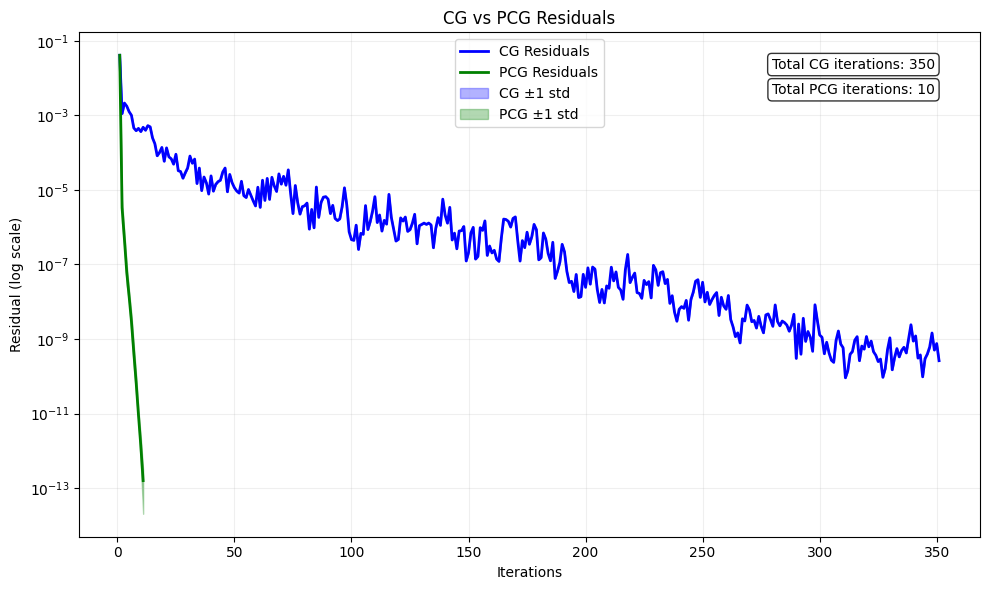

In [11]:
plot_residuals(cg_mean_res, pcg_mean_res, cg_std=cg_std_res, pcg_std=pcg_std_res,
                   title="CG vs PCG Residuals", figsize=(10, 6), log_scale=True)

In [12]:
results_cg = pd.read_csv("EIT_results_cg_mu_1e-07_h_0_001.csv")
results_nyst_pcg = pd.read_csv("EIT_results_nyst_pcg_mu_1e-07_h_0_001.csv")

cg_mean_res = parse_numpy_array_string(results_cg["mean_residuals"].iloc[0])
cg_std_res  = parse_numpy_array_string(results_cg["std_residuals"].iloc[0])

pcg_mean_res = parse_numpy_array_string(results_nyst_pcg["mean_residuals"].iloc[0])
pcg_std_res  = parse_numpy_array_string(results_nyst_pcg["std_residuals"].iloc[0])

In [13]:
results_cg

,mean_cg_it,std_cg_it,mean_residuals,std_residuals,mean_runtime,std_runtime
0,236.0,0.0,[4.07181035e-02 1.10852389e-03 2.12585839e-03 ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,20697.998088,1455.785981


In [14]:
results_nyst_pcg

,mean_cg_it,std_cg_it,mean_residuals,std_residuals,mean_runtime,std_runtime,mean_approx_rank,mean_preconditioner_time
0,6.25,0.433013,[4.07181035e-02 1.38758197e-06 5.99872214e-08 ...,[0.00000000e+00 7.62636470e-07 2.80884828e-08 ...,19670.69157,639.082672,100.0,302.497001


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'CG vs PCG Residuals'}, xlabel='Iterations', ylabel='Residual (log scale)'>)

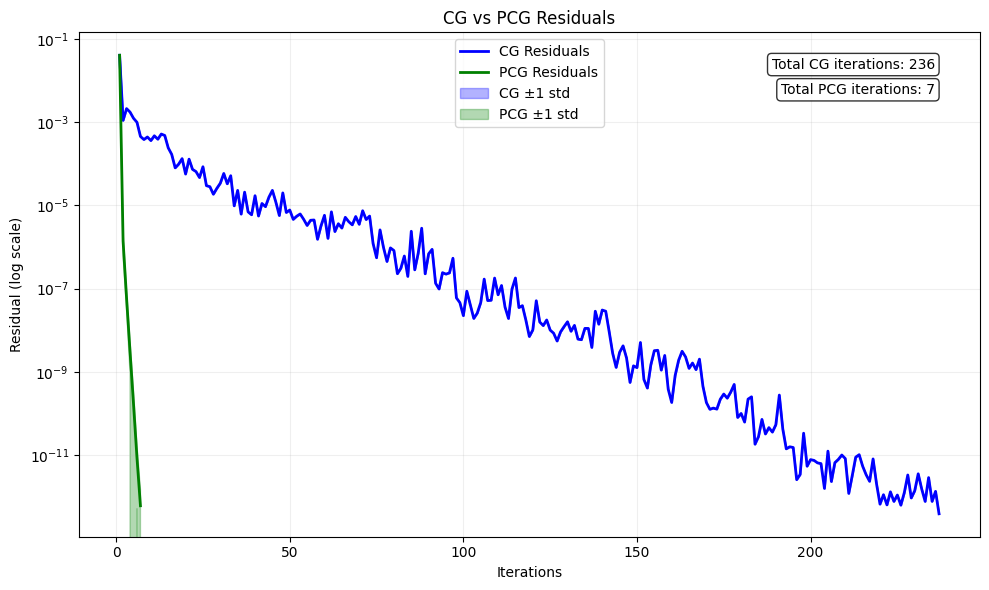

In [15]:
plot_residuals(cg_mean_res, pcg_mean_res, cg_std=cg_std_res, pcg_std=pcg_std_res,
                   title="CG vs PCG Residuals", figsize=(10, 6), log_scale=True)

In [16]:
results_cg = pd.read_csv("EIT_results_cg_mu_1e-06_h_0_001.csv")
results_nyst_pcg = pd.read_csv("EIT_results_nyst_pcg_mu_1e-06_h_0_001.csv")

cg_mean_res = parse_numpy_array_string(results_cg["mean_residuals"].iloc[0])
cg_std_res  = parse_numpy_array_string(results_cg["std_residuals"].iloc[0])

pcg_mean_res = parse_numpy_array_string(results_nyst_pcg["mean_residuals"].iloc[0])
pcg_std_res  = parse_numpy_array_string(results_nyst_pcg["std_residuals"].iloc[0])

In [18]:
results_cg

,mean_cg_it,std_cg_it,mean_residuals,std_residuals,mean_runtime,std_runtime
0,113.0,0.0,[4.09435005e-02 1.10129062e-03 2.09094603e-03 ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,22821.951506,5444.303656


In [19]:
results_nyst_pcg

,mean_cg_it,std_cg_it,mean_residuals,std_residuals,mean_runtime,std_runtime,mean_approx_rank,mean_preconditioner_time
0,4.5,0.5,[4.09435005e-02 8.95076454e-07 8.12388784e-09 ...,[0.00000000e+00 3.32373471e-08 1.75651026e-09 ...,19627.936901,593.787015,100.0,306.735027


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'CG vs PCG Residuals'}, xlabel='Iterations', ylabel='Residual (log scale)'>)

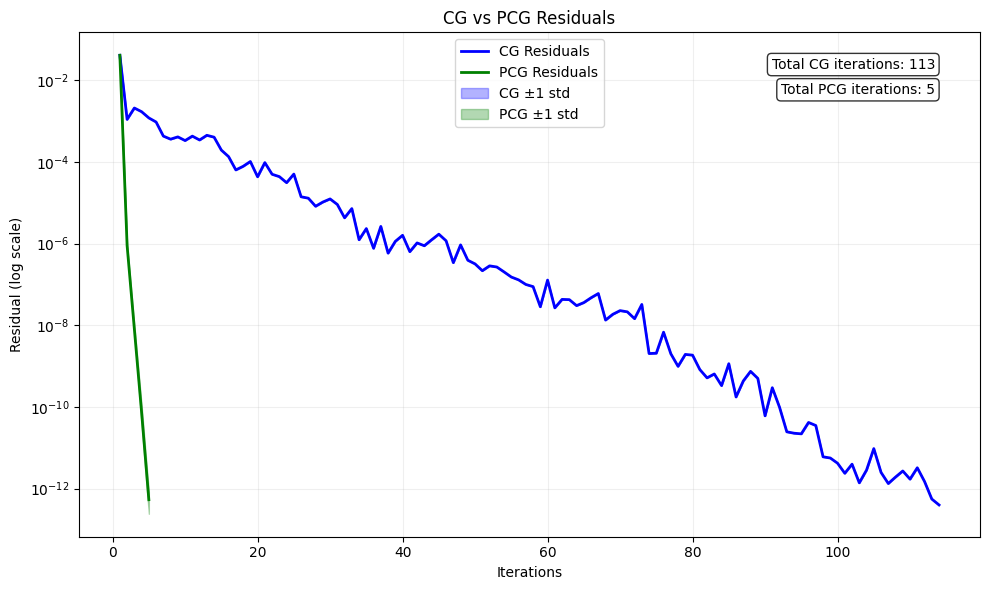

In [20]:
plot_residuals(cg_mean_res, pcg_mean_res, cg_std=cg_std_res, pcg_std=pcg_std_res,
                   title="CG vs PCG Residuals", figsize=(10, 6), log_scale=True)